# Task 1:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

from sklearn import metrics
from sklearn.datasets import make_circles

import warnings
warnings.filterwarnings('ignore')

In [25]:
car_df=pd.read_csv('DS2_C6_S4_CarSales_Data_Challenge.csv')
car_df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [26]:
car_df.shape

(157, 16)

In [27]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [28]:
# Converting Object to float
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
car_df['Manufacturer']=lbl.fit_transform(car_df['Manufacturer'])
car_df['Model']=lbl.fit_transform(car_df['Model'])
car_df['Vehicle_type']=lbl.fit_transform(car_df['Vehicle_type'])
car_df['Latest_Launch']=lbl.fit_transform(car_df['Latest_Launch'])

In [29]:
car_df.describe()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
count,157.000000,157.000000,157.000000,121.000000,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,157.000000,155.000000
mean,14.515924,77.668790,52.998076,18.072975,0.738854,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,64.394904,77.043591
std,8.595322,45.082032,68.029422,11.453384,0.440665,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,37.979711,25.142664
min,0.000000,0.000000,0.110000,5.160000,0.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,0.000000,23.276272
25%,7.000000,39.000000,14.114000,11.260000,0.000000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,31.000000,60.407707
50%,15.000000,78.000000,29.450000,14.180000,1.000000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,64.000000,72.030917
75%,21.000000,116.000000,67.956000,19.875000,1.000000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,97.000000,89.414878
max,29.000000,155.000000,540.561000,67.550000,1.000000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,129.000000,188.144323


In [30]:
car_df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [31]:
car_df.dropna(inplace=True)

In [32]:
car_df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [33]:
car_df.drop(columns=['__year_resale_value'],inplace= True)

In [34]:
car_df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,0,79,16.919,1,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,47,58.280150
1,0,143,39.384,1,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,93,91.370778
3,0,115,8.588,1,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,52,91.389779
4,1,8,20.397,1,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,20,62.777639
5,1,9,18.780,1,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,119,84.565105


# Task 2:

In [40]:
X=car_df[['Width','Length']]
X

,Width,Length
0,67.3,172.4
1,70.3,192.9
3,71.4,196.6
4,68.2,178.0
5,76.1,192.0
...,...,...
145,68.3,163.3
146,68.3,172.3
147,68.5,184.1
148,66.7,160.4


In [36]:
from sklearn.cluster import DBSCAN
eps=0.35     # here we took 0.35 as distance (given)
for min_sample in [8,9,10,11,12,13]:
    clus=DBSCAN(eps=eps,min_samples=min_sample)   # here we are using the hyper-parameter i.e we are not using default values we are giving it manually as per our choice
    clus_lbl=clus.fit_predict(X)
    x1=clus_lbl+2
    y1=np.bincount(x1)
    ii=np.nonzero(y1)[0]
    resuls=list(zip(ii,y1[ii]))
    print('eps =',eps,'min_sample =',min_sample, 'clustered =', resuls)  

eps = 0.35 min_sample = 8 clustered = [(1, 117)]
eps = 0.35 min_sample = 9 clustered = [(1, 117)]
eps = 0.35 min_sample = 10 clustered = [(1, 117)]
eps = 0.35 min_sample = 11 clustered = [(1, 117)]
eps = 0.35 min_sample = 12 clustered = [(1, 117)]
eps = 0.35 min_sample = 13 clustered = [(1, 117)]


In [37]:
X

,Width,Length
0,67.3,172.4
1,70.3,192.9
3,71.4,196.6
4,68.2,178.0
5,76.1,192.0
...,...,...
145,68.3,163.3
146,68.3,172.3
147,68.5,184.1
148,66.7,160.4


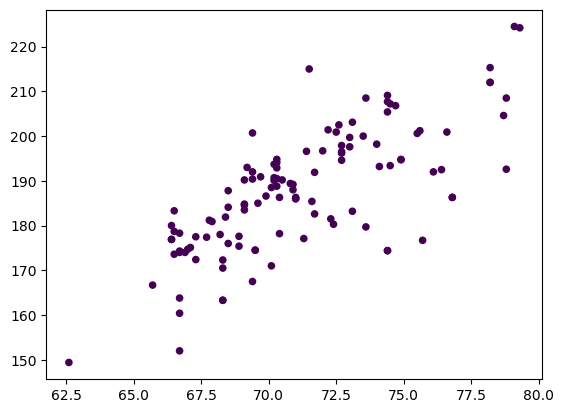

In [41]:
db_model=DBSCAN(eps=0.075,min_samples=11)
db_model.fit(X[['Width','Length']])
X['db_model.labels_']=db_model.labels_
plt.scatter(X["Width"],X["Length"], s=20,c=X['db_model.labels_'])

# Task 3:

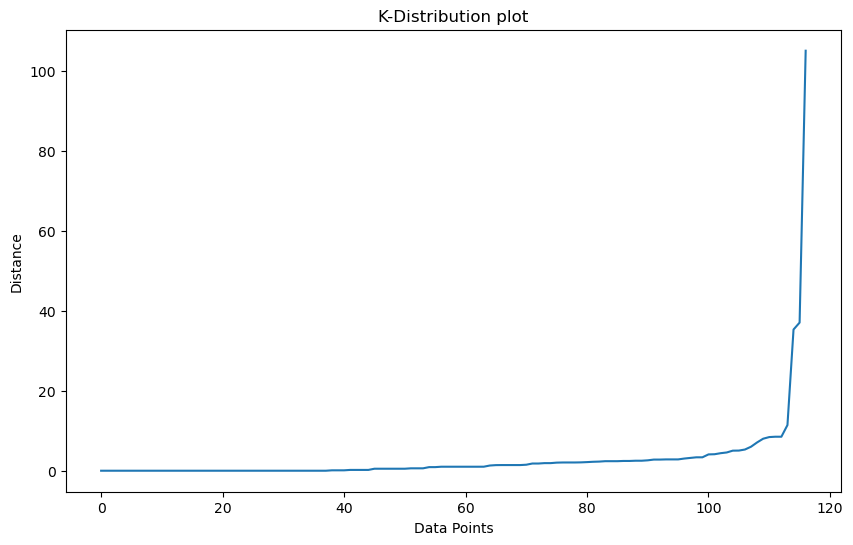

In [43]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=11)
nrbr=neigh.fit(car_df[['Horsepower','Fuel_capacity']])
distance, indices=nrbr.kneighbors(car_df[['Horsepower','Fuel_capacity']])

# plotting the k-distance

distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.figure(figsize=(10,6))
plt.plot(distance)
plt.title('K-Distribution plot')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

Here we will take turning point as distance, here it is 10.

In [44]:
eps=10     # here e took 10 as distance from above graph
for min_sample in [8,9,10,11,12,13]:
    clus=DBSCAN(eps=eps,min_samples=min_sample)   # here we are using the hyper-parameter i.e we are not using default values we are giving it manually as per our choice
    clus_lbl=clus.fit_predict(car_df)
    x1=clus_lbl+2
    y1=np.bincount(x1)
    ii=np.nonzero(y1)[0]
    resuls=list(zip(ii,y1[ii]))
    print('eps =',eps,'min_sample =',min_sample, 'clustered =', resuls) 

eps = 10 min_sample = 8 clustered = [(1, 117)]
eps = 10 min_sample = 9 clustered = [(1, 117)]
eps = 10 min_sample = 10 clustered = [(1, 117)]
eps = 10 min_sample = 11 clustered = [(1, 117)]
eps = 10 min_sample = 12 clustered = [(1, 117)]
eps = 10 min_sample = 13 clustered = [(1, 117)]


# Task 4:

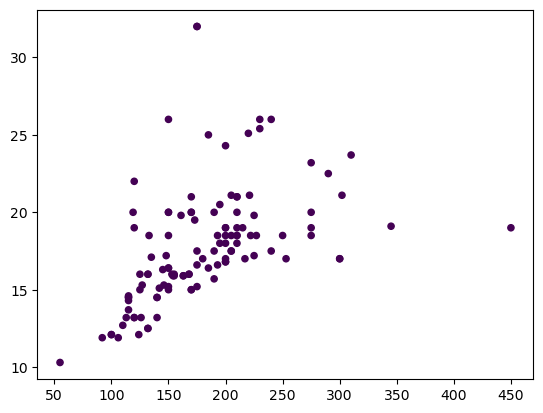

In [46]:
db_model=DBSCAN(eps=10,min_samples=11)
db_model.fit(car_df)
car_df['db_model.labels_']=db_model.labels_
plt.scatter(car_df['Horsepower'],car_df['Fuel_capacity'], s=20,c=car_df['db_model.labels_'])

# Interpretation: Here we can see with Optimum value we are getting Structured ata in increasing manner, and without optimum valuei.e predefined value we are getting unstructured clustered data.